<a href="https://colab.research.google.com/github/ankitan07/Hack_dearborn_2/blob/main/Gene_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
# Installing the Bio module
!pip install Bio

In [79]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import Bio
from Bio.SeqUtils import GC
from sklearn.feature_extraction.text import CountVectorizer
#from IPython.display import Image
#sns.set()

In [82]:
from sklearn.model_selection import StratifiedKFold,cross_val_score,cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import *

In [139]:
df=pd.read_csv("gene.csv")

In [133]:
df['class']=df['class'].map(lambda x:idx_variant[x])

In [138]:
df.to_csv("/content/gene.csv",index=False)

In [132]:
variant_idx={"G1V1":0,"G1V2":1 , "G1V3":2 ,"G1V4":3,"G2V1":4,"G3V1":5,"G4V1":6}
idx_variant={0:"G1V1",1:"G1V2",2:"G1V3",3:"G1V4",4:"G2V1",5:"G3V1",6:"G4V1"}


In [140]:
df["length"] = df.sequence.apply(lambda x : len(x))  # finding the length of each DNA Sequence

In [141]:
def kmer_counting(s,n=6):
  output=[s[i:i+n].upper() for i in range(len(s) - n + 1)]
  return output

In [142]:
df['words'] = df.apply(lambda x:kmer_counting(x['sequence']), axis=1)

In [143]:
df.head()

,sequence,class,length,words
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,G2V1,207,"[ATGCCC, TGCCCC, GCCCCA, CCCCAA, CCCAAC, CCAAC..."
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,G2V1,681,"[ATGAAC, TGAACG, GAACGA, AACGAA, ACGAAA, CGAAA..."
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,G1V4,1686,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA..."
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,G1V4,1206,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA..."
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,G1V4,1437,"[ATGCAA, TGCAAC, GCAACA, CAACAG, AACAGC, ACAGC..."


In [144]:
#We are now going to Convert the words into string and then apply Count Vectorizer
df["in_string"] =df["words"].apply(lambda x:  ' '.join(x))
df[["words","in_string"]]

,words,in_string
0,"[ATGCCC, TGCCCC, GCCCCA, CCCCAA, CCCAAC, CCAAC...",ATGCCC TGCCCC GCCCCA CCCCAA CCCAAC CCAACT CAAC...
1,"[ATGAAC, TGAACG, GAACGA, AACGAA, ACGAAA, CGAAA...",ATGAAC TGAACG GAACGA AACGAA ACGAAA CGAAAA GAAA...
2,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...",ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
3,"[ATGTGT, TGTGTG, GTGTGG, TGTGGC, GTGGCA, TGGCA...",ATGTGT TGTGTG GTGTGG TGTGGC GTGGCA TGGCAT GGCA...
4,"[ATGCAA, TGCAAC, GCAACA, CAACAG, AACAGC, ACAGC...",ATGCAA TGCAAC GCAACA CAACAG AACAGC ACAGCA CAGC...
...,...,...
4375,"[ATGGAA, TGGAAG, GGAAGA, GAAGAT, AAGATT, AGATT...",ATGGAA TGGAAG GGAAGA GAAGAT AAGATT AGATTT GATT...
4376,"[ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...",ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
4377,"[ATGCAG, TGCAGT, GCAGTC, CAGTCC, AGTCCT, GTCCT...",ATGCAG TGCAGT GCAGTC CAGTCC AGTCCT GTCCTT TCCT...
4378,"[ATGGGG, TGGGGC, GGGGCA, GGGCAC, GGCACC, GCACC...",ATGGGG TGGGGC GGGGCA GGGCAC GGCACC GCACCT CACC...


In [145]:
y=df.loc[:,'class'].values
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(df["in_string"])

In [146]:
def get_metrics(y_test, y_predicted):
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average='weighted')
    recall = recall_score(y_test, y_predicted, average='weighted')
    f1 = f1_score(y_test, y_predicted, average='weighted')
    return accuracy, precision, recall, f1

In [147]:
from sklearn.model_selection import train_test_split
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=10,  test_size=0.25,shuffle=True)
dt =DecisionTreeClassifier()
dt.fit(X_train,y_train)
pred=dt.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, pred)
print(" Decision tree Model : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

 Decision tree Model : Accuracy = 0.81461     F1_Score = 0.81875


In [148]:
rf = RandomForestClassifier(n_jobs=-1)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, pred)
print("Random Forest Model : Accuracy = %.5f     F1_Score = %.5f" % (accuracy, f1))

Random Forest Model : Accuracy = 0.90502     F1_Score = 0.90560


In [149]:
## Used Grid Search to find the best Hyperparameters.
nb = MultinomialNB(alpha=0.1)
nb.fit(X_train,y_train)
pred=nb.predict(X_test)
accuracy, precision, recall, f1 = get_metrics(y_test, pred)
print("Naive Bayes Model: Accuracy = %.5f    F1_Score = %.5f" % (accuracy, f1))

Naive Bayes Model: Accuracy = 0.97352    F1_Score = 0.97353


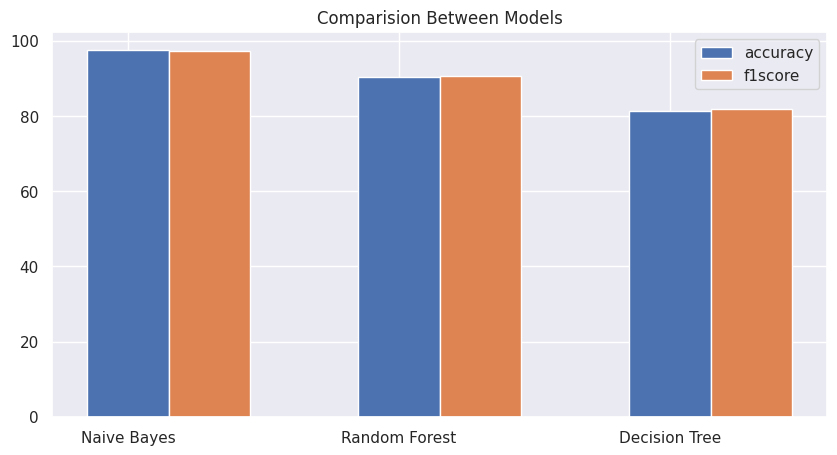

In [150]:
#scores ={"Naive Bayes":98.059  ,"Random Forest":91.4 ,"Decision Tree": 81.5}
plt.figure(figsize=(10,5))
scores=["Naive Bayes","Random Forest","Decision Tree"]
accscore=[97.534,90.502,81.461]
f1score=[97.353,90.560,81.875]
w=0.3
bar1=np.arange(len(scores))
bar2=[i+w for i in bar1]

plt.bar(bar1,accscore,w,label="accuracy")
plt.bar(bar2,f1score,w,label="f1score")
plt.xticks(bar1, scores)
plt.legend()
plt.title("Comparision Between Models")
plt.show()

In [151]:
import pickle

In [152]:
import pickle
with open('finalized_model.pkl', 'wb') as fout:
    pickle.dump((cv, nb), fout)

In [153]:
import pickle
with open('finalized_model.pkl', 'rb') as f:
    cv,nb = pickle.load(f)

<Axes: xlabel='Predicted', ylabel='Actual'>

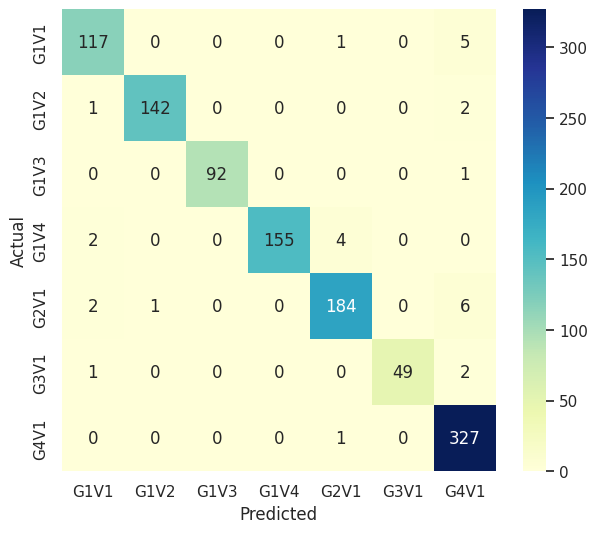

In [160]:
# Heat Map for Naive Bayes Model (Best Model)
y_pred=nb.predict(X_test)
plt.figure(figsize=(7,6))
sns.heatmap(pd.crosstab(pd.Series(y_test, name='Actual'), pd.Series(y_pred, name='Predicted')),cmap="YlGnBu",annot=True,fmt='d')